# Weekly

In [1]:
import os

import numpy as np
import pandas as pd
import statsmodels.api as sm

DAT_DIR = './dat/weekly/'

In [73]:
def get_valid_files(pth):
    return filter(lambda x: x!= '.DS_Store', os.listdir(pth))

ll = []

for sub_folder in get_valid_files(DAT_DIR):
    cur_dir = os.path.join(DAT_DIR, sub_folder)
    for week_file_name in get_valid_files(cur_dir):
        df = pd.read_csv(os.path.join(cur_dir, week_file_name))
        df['Year'] = int(sub_folder)
        df['Week'] = int(week_file_name.replace('week','').replace('.csv',''))
        ll.append(df)
        
    print(f'Done with {cur_dir}.')

Done with ./dat/weekly/2013.
Done with ./dat/weekly/2014.
Done with ./dat/weekly/2015.
Done with ./dat/weekly/2012.
Done with ./dat/weekly/2008.
Done with ./dat/weekly/2001.
Done with ./dat/weekly/2006.
Done with ./dat/weekly/2007.
Done with ./dat/weekly/2000.
Done with ./dat/weekly/2009.
Done with ./dat/weekly/2017.
Done with ./dat/weekly/2010.
Done with ./dat/weekly/2019.
Done with ./dat/weekly/2018.
Done with ./dat/weekly/2011.
Done with ./dat/weekly/2016.
Done with ./dat/weekly/1999.
Done with ./dat/weekly/2005.
Done with ./dat/weekly/2002.
Done with ./dat/weekly/2003.
Done with ./dat/weekly/2004.


## EDA

In [74]:
df_all = pd.concat(ll)
df_all = df_all[~df_all[['Player','Year','Week']].duplicated()]
df_all = df_all.sort_values(['Player','Year','Week'])
df_all.reset_index(drop = True, inplace = True)
#df_all['Tm'] = df_all['Tm'].str.replace('SDG','LAC').str.replace('OAK','LAR').str.replace('LAR','LVR')

In [75]:
len(set(df_all['Player']))

3628

In [76]:
len(set(df_all['Pos']))

137

In [77]:
len(set(df_all['Tm']))

34

In [78]:
reload2019 = True
if reload2019:
    # 538: https://github.com/fivethirtyeight/nfl-elo-game
    df_games = pd.read_csv('https://projects.fivethirtyeight.com/nfl-api/2019/nfl_games_2019.csv')
    df_games.to_csv('./dat/scores/scores2019.csv', index = False)
else:
    df_games = pd.read_csv('./dat/scores/scores2019.csv')
    
df_games = pd.concat([df_games, pd.read_csv('./dat/scores/nfl_games.csv')])
df_games['date'] = pd.to_datetime(df_games['date'])
df_games['DayOfWeek'] = df_games['date'].dt.dayofweek
df_games = df_games.sort_values(['date','team1','team2']).reset_index(drop = True)

In [79]:
first_games = df_games.groupby('season')['date'].min().reset_index()

Interestingly the day of week of the first game of the season has varied quite a bit and fallen on every day of the week but Monday or Tuesday. After the Super Bowl Era began, it was mostly on a Sunday, though a few seasons started on Friday/Saturday. Although it [seems](https://en.wikipedia.org/wiki/Thursday_Night_Football) Thursday Night Football did not debut until 2006-2007 season, the introduction of the season starting on a Thursday actually coincides with the debut of the [NFL Kickoff Game](https://en.wikipedia.org/wiki/NFL_Kickoff_Game) during the 2002-2003 season. Thus, the date from that page is probably related to the *brand* "Thursday Night Football" not the actual debut of football occurring on a Thursday. In fact, football occurred on Thursdays all the way back to 1920.  Note that the Wednesday Kickoff Game during the 2012-2013 season was due to [a conflict with the 2012 DNC](https://en.wikipedia.org/wiki/2012_NFL_season#Other_highlights). 

Based on this quick analysis, we are going to define the "Football Week" as Wednesday through the following Tuesday. 

In [80]:
pd.options.display.max_columns = 999

df_ct = df_games.groupby(['season','DayOfWeek'])['date'].count().reset_index()
df_ct['date'] = 1
df_ct = df_ct.pivot(index = 'DayOfWeek', columns = 'season', values = 'date').fillna(0)
df_ct = pd.DataFrame(df_ct.values.astype(int), columns = df_ct.columns, index = df_ct.index)
df_ct

season,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
DayOfWeek,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [81]:
df_ct.sum(axis=1)

DayOfWeek
0     70
1     16
2     15
3     96
4     34
5     89
6    100
dtype: int64

In [82]:
df_games.groupby('DayOfWeek')['season'].min()

DayOfWeek
0    1921
1    1924
2    1925
3    1920
4    1927
5    1920
6    1920
Name: season, dtype: int64

In [83]:
pd.to_datetime(first_games['date']).dt.dayofweek.value_counts()

6    58
3    17
5    12
4    12
2     1
Name: date, dtype: int64

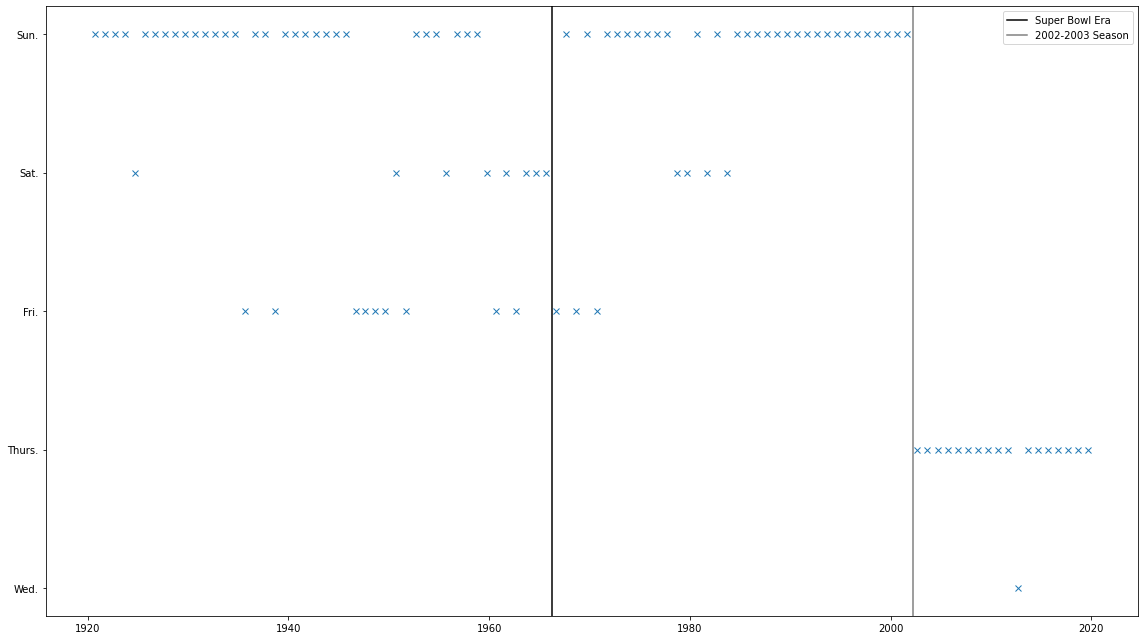

In [84]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (16,9))
dates = first_games['date']
plt.plot(dates, dates.dt.dayofweek, marker = 'x', linestyle = '')
plt.yticks(ticks = [2, 3, 4, 5, 6], labels = ['Wed.', 'Thurs.', 'Fri.', 'Sat.', 'Sun.'])
plt.axvline(pd.to_datetime('1966-04'), color = 'black', label = 'Super Bowl Era')
plt.axvline(pd.to_datetime('2002-04'), color = 'grey', label = '2002-2003 Season')
plt.legend()
plt.tight_layout();

In [85]:
first_games['DayOfWeek'] = first_games['date'].dt.dayofweek
first_games['FirstDayOfSeason'] = first_games['date'] - pd.TimedeltaIndex(first_games['DayOfWeek'] - 2, unit = 'D')

In [86]:
df_games = df_games.merge(first_games[['season','FirstDayOfSeason']], on = 'season', validate = 'm:1')
df_games['DaysSinceFirstDayOfSeason'] = (df_games['date'] - df_games['FirstDayOfSeason']).dt.days

In [87]:
df_games['week'] = 1 + (df_games['DaysSinceFirstDayOfSeason'] // 7)

In [88]:
df_games['week'].value_counts().sort_index()

1      910
2     1007
3     1015
4     1017
5     1023
6     1018
7     1024
8     1015
9     1025
10    1037
11    1056
12    1031
13     964
14     913
15     796
16     703
17     518
18     208
19     147
20      68
21      19
22      27
Name: week, dtype: int64

As a few sanity checks:

* The seasons where there *is* a week 22 are from 1991 onward (albeit not consistently)
* The first game of the 2020-2021 season was on `'2020-09-30'`. This is a Thursday so the true first day of the season is `'2020-09-02'` (a Wednesday). And 22 weeks and 4 days later takes us to `'2020-02-07'`, Super Bowl Sunday. 

In [89]:
sorted(df_games[df_games['week'] == 22]['season'].unique())

[1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 2000,
 2001,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [90]:
pd.to_datetime('2020-09-02') + pd.Timedelta(days = 22 * 7 + 4)

Timestamp('2021-02-07 00:00:00')

We were after a map from season, week and team to opposing team. That is simply the sub-dataframe of the above with the respective columns. In theory it should not have duplicate entries, but some of the older games have this. It turns out those games actually have differing data (scores in particular). In the end, we are building a model on the player data which does not go back this far anyway so we will simplify things here and just drop anything before the 1930-1931 season (though in practice we will not even need data that far back). 

In [91]:
df_vs = df_games[['season','week','team1','team2']]

df_vs[df_vs.duplicated()]

,season,week,team1,team2
684,1927,12,CHI,FYJ
813,1929,12,NYG,FYJ


In [92]:
df_vs = df_games[df_games['season']>=1930][['season','week','team1','team2','score1','score2']]

In [93]:
df_vs_cp = df_vs.copy()

tmp = df_vs_cp['team2'].copy()
df_vs_cp['team2'] = df_vs_cp['team1']
df_vs_cp['team1'] = tmp

tmp = df_vs_cp['score2'].copy()
df_vs_cp['score2'] = df_vs_cp['score1']
df_vs_cp['score1'] = tmp

df_vs = pd.concat([df_vs, df_vs_cp]).sort_values(['season','week','team1']).reset_index(drop = True)
df_vs.columns = ['Year','Week','Team1','Team2','Score1','Score2']

In [94]:
df_vs.head()

,Year,Week,Team1,Team2,Score1,Score2
0,1930,1,DET,TOR,13,6
1,1930,1,TOR,DET,6,13
2,1930,2,ARI,GB,0,14
3,1930,2,BKN,CHI,0,0
4,1930,2,CHI,BKN,0,0


# Cleaning Positions Data

In [95]:
res = (df_all.groupby('Pos')['PPRFantasyPoints'].sum() / df_all['PPRFantasyPoints'].sum())
res = res.sort_values(ascending = False)
print(res.head(25) * 100)
print()
print(res.cumsum().head(25) * 100)

Pos
WR       38.922234
RB       24.766645
QB       18.032709
TE       12.929195
FB        2.419646
HB        1.731186
FL        0.192790
SE        0.145734
RB/K      0.123978
RB-K      0.059419
WR/K      0.046054
H-B       0.031729
RB/KR     0.029831
WR-K      0.029194
XR        0.027088
ZR        0.024531
Z         0.022923
RWR       0.021777
X         0.019903
LWR       0.016325
P         0.015885
TE/F      0.014788
WR/RS     0.012902
WR-P      0.011872
WR/R      0.011571
Name: PPRFantasyPoints, dtype: float64

Pos
WR       38.922234
RB       63.688880
QB       81.721588
TE       94.650783
FB       97.070429
HB       98.801615
FL       98.994405
SE       99.140139
RB/K     99.264117
RB-K     99.323536
WR/K     99.369589
H-B      99.401318
RB/KR    99.431149
WR-K     99.460343
XR       99.487432
ZR       99.511963
Z        99.534886
RWR      99.556663
X        99.576566
LWR      99.592891
P        99.608776
TE/F     99.623564
WR/RS    99.636466
WR-P     99.648338
WR/R     99.659909
Na

The below dictionary `pos_map` was constructed by hand. I iterated on the below until the positions in the top 25 that were uncategorized did not naturally fall into the four most important categories: QB, RB, TE, WR. Top 25 excluding those top 4 positions of course, which accounts for over 99.7% of the data.

In [96]:
pos_map = {'FB':'RB',
           'HB':'RB',
           'FL':'WR',
           'SE':'WR',
           'RB/K':'RB',
           'RB-K':'RB',
           'WR/K':'WR',
           'H-B':'WR',
           'RB/KR':'RB',
           'WR-K':'WR',
           'XR':'WR',
           'ZR':'WR',
           'Z':'WR',
           'RWR':'WR',
           'X':'WR',
           'LWR':'WR',
           'P':'K',
           'TE/F':'TE',
           'WR/RS':'WR',
           'WR-P':'WR',
           'WR/R':'WR',
           'WR/P':'WR',
           'FB/T':'RB',
           'RB/F':'RB',
           #'KR/P':
           #'LT':,
           'TB':'RB',
           'TE/L':'TE',
           'KR/W':'WR',
           #'F':
           'FB/R':'RB',
           'HB-K':'RB',
           'RB-KR':'RB',
           'HB/K':'RB',
           'X-WR':'WR',
           'WR W':'WR',
           'WR-KR':'WR',
           'QB-W':'QB'
          }
df_pos_map = pd.DataFrame([pos_map.keys(), pos_map.values()]).T
df_pos_map.columns = ['Pos','SimplifiedPos']

df_all = df_all.merge(df_pos_map, how = 'left', on = 'Pos', validate = 'm:1')
df_all.loc[df_all['SimplifiedPos'].isnull(),'SimplifiedPos'] = df_all.loc[df_all['SimplifiedPos'].isnull(),'Pos']
del df_all['Pos']
df_all.rename({'SimplifiedPos':'Pos'}, axis = 1, inplace = True)

In [97]:
res = (df_all.groupby('Pos')['PPRFantasyPoints'].sum() / df_all['PPRFantasyPoints'].sum())
res = res.sort_values(ascending = False)
print(res.head(25) * 100)
print()
print(res.cumsum().head(25) * 100)

Pos
WR       39.565792
RB       29.184650
QB       18.035277
TE       12.952593
K         0.023830
KR/P      0.010472
LT        0.010044
F         0.006700
T         0.006434
KR        0.004189
DT        0.004189
LB        0.004131
OLB       0.003900
RDE       0.003900
TE/W      0.003830
QB/W      0.003529
NT        0.003504
OL        0.003425
LG        0.003414
S         0.003053
DL        0.003032
FB/TE     0.002840
TE-L      0.002823
0         0.002511
ILB       0.002337
Name: PPRFantasyPoints, dtype: float64

Pos
WR       39.565792
RB       68.750442
QB       86.785720
TE       99.738312
K        99.762142
KR/P     99.772614
LT       99.782658
F        99.789358
T        99.795792
KR       99.799980
DT       99.804169
LB       99.808300
OLB      99.812200
RDE      99.816099
TE/W     99.819929
QB/W     99.823459
NT       99.826962
OL       99.830387
LG       99.833801
S        99.836854
DL       99.839885
FB/TE    99.842725
TE-L     99.845548
0        99.848059
ILB      99.850397
Na

# Season Number

We just want to construct a season number for each player.

In [98]:
df_first_season = df_all.groupby('Player')['Year'].min().reset_index()
df_first_season.columns = ['Player','FirstSeason']
df_all = df_all.merge(df_first_season, how = 'left', on = 'Player', validate = 'm:1')
df_all['SeasonNumber'] = 1 + df_all['Year'] - df_all['FirstSeason']
df_all['SeasonNumber'].describe()

count    98071.000000
mean         4.126837
std          3.005978
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         21.000000
Name: SeasonNumber, dtype: float64

And again, the players with the longest tenures are exactly as expected. There is a small problem: different players with the same name. Here we have Adrian Peterson who has not been around 18 or more years. There was an [Adrian Peterson](https://en.wikipedia.org/wiki/Adrian_Peterson_(American_football,_born_1979)) who joined the league in 2002 as well as the [currently active Adrian Peterson](https://en.wikipedia.org/wiki/Adrian_Peterson). That makes "Adrian Peterson's" career seem much longer than it actually is by this construction. Without a unique player ID and/or an external datasource this is a challenge for this dataset and probably has to be handled manually. 

In [99]:
set(df_all[df_all['SeasonNumber'] >= 17]['Player'])

{'Adrian Peterson',
 'Antonio Brown',
 'Cedrick Wilson',
 'Charles Johnson',
 'Charles Woodson',
 'Drew Brees',
 'Irv Smith',
 'Jason Witten',
 'Josh McCown',
 'Justin Watson',
 'Malcolm Johnson',
 'Marvin Jones',
 'Matt Hasselbeck',
 'Peyton Manning',
 'Rod Smith',
 'Tom Brady'}

# Player Prior Year Avg. 

In [100]:
fantasy_point_field = 'PPRFantasyPoints'
df_player_by_year = df_all.groupby(['Player','SeasonNumber'])[fantasy_point_field].sum().reset_index()

In [101]:
df_tmp = df_player_by_year.groupby('Player')['SeasonNumber'].max().reset_index()
ll = [(row['Player'], list(range(1, row['SeasonNumber'] + 1))) for _, row in df_tmp.iterrows()]
df_tmp = pd.DataFrame(ll, columns = ['Player','SeasonNumber']).explode('SeasonNumber')

df_player_by_year = df_player_by_year.merge(df_tmp, how = 'outer', on = ['Player','SeasonNumber'])
df_player_by_year[fantasy_point_field] = df_player_by_year[fantasy_point_field].fillna(0)
df_player_by_year = df_player_by_year.sort_values(['Player','SeasonNumber']).reset_index(drop = True)

del df_tmp, ll

Cute trick... $\frac{1}{n}\left(1+\ldots+n\right)=\frac{1}{n}\cdot\frac{n\cdot(n+1)}{2}=\frac{n+1}{2}$. Thus, rather than trying to figure out a way to retain the `SeasonNumber` in my `.groupby()` (imagine googling that! how fun...) I can just compute the expanding average of the player's `SeasonNumber`. As the "proof" shows, the $n$th term in the expanding average of the series of $1,2,\ldots$ is $\frac{n+1}{2}$ so this can be inverted back for $n$. 

The purpose of computing this is to get each player's prior year average. Thus, we won't subtract 1, which is equivalent to lagging the season number. 

In [102]:
df_player_prior_year_avg = df_player_by_year.groupby('Player')[['SeasonNumber',fantasy_point_field]]
df_player_prior_year_avg = df_player_prior_year_avg.expanding().mean().reset_index(level = 'Player')
df_player_prior_year_avg['SeasonNumber']*=2
#df_player_prior_year_avg['SeasonNumber']-=1 # Commented out b/c we want to lag this.
df_player_prior_year_avg.rename({fantasy_point_field:'PriorYearAvg'},axis=1,inplace=True)

In [103]:
df_all = df_all.merge(df_player_prior_year_avg, how = 'left', on = ['Player','SeasonNumber'], validate = 'm:1')

# Player Prior Year Avg. Adjusted for Rookies

First we will show that the missing values for `PriorYearAvg` occur when the player's `SeasonNumber` is exactly 1, i.e. when they are a rookie. 

In [104]:
df_all[df_all['PriorYearAvg'].isnull()]['SeasonNumber'].value_counts()

1    19886
Name: SeasonNumber, dtype: int64

In [105]:
print('{:.2f}% missing PriorYearAvg.'.format(100 * df_all['PriorYearAvg'].isnull().sum() / len(df_all)))

20.28% missing PriorYearAvg.


To fix this so we can form forecasts for rookie players, we will instead use the position's median points scored in the prior year. This gives us a typical level for the player in order to have *something* to form a forecast. 

In [106]:
df_player_by_year.head()

,Player,SeasonNumber,PPRFantasyPoints
0,A.J. Brown,1.0,217.10
1,A.J. Derby,1.0,30.00
2,A.J. Derby,2.0,55.40
3,A.J. Derby,3.0,13.80
4,A.J. Feeley,1.0,11.72


In [107]:
df_rookie_fix = df_all.groupby(['Player','Pos','Year'])[fantasy_point_field].sum().reset_index()
df_rookie_fix = df_rookie_fix.groupby(['Pos','Year'])[fantasy_point_field].median().reset_index()
df_rookie_fix['Year']+=1
df_rookie_fix.columns = ['Pos','Year','PriorYearPosMedPts']

df_all = df_all.merge(df_rookie_fix, how = 'left', on = ['Pos','Year'], validate = 'm:1')

Now we are in a better position as only a little under 5% of datapoints are missing **both** of these variables. 

In [108]:
df_all['x1'] = np.where(df_all['PriorYearAvg'].isnull(), df_all['PriorYearPosMedPts'], df_all['PriorYearAvg'])
print('{:.2f}% missing x1.'.format(100 * df_all['x1'].isnull().sum() / len(df_all)))

4.86% missing x1.


Importantly, the only time we missing this variable `x1` for the key positions of QB, RB, WR and TE is the year 1999 when the dataset actually starts. That's something we can't do anything about unless we loop in more data. 

In [109]:
idx = df_all['x1'].isnull() & df_all['Pos'].isin({'QB','RB','WR','TE'})
set(df_all[idx]['Year'])

{1999}

And even better, that is a big fraction of the missing `x1` data noted above. 

In [110]:
print('{:.2f}% missing PriorYearAvg.'.format(100 * len(df_all[idx]) / len(df_all)))

4.49% missing PriorYearAvg.


In [111]:
sm.OLS.from_formula('PPRFantasyPoints ~ x1 + SeasonNumber', data = df_all).fit().summary() #0.0451

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       PPRFantasyPoints   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                 1.086e+04
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        21:39:02   Log-Likelihood:            -3.1506e+05
No. Observations:               93306   AIC:                         6.301e+05
Df Residuals:                   93303   BIC:                         6.301e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.7286      0.044    106.348      0.000       4.641       4.816
x1               0.0468      0.000    139.734      0.000       0.046       0.047
SeasonNumber    -0.0905      0.008    -10.788      0.000      -0.107      -0.074
==============================================================================
Omnibus:                    18398.923   Durbin-Watson:                   1.444
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37319.021
Skew:                           1.182   Prob(JB):                         0.00
Kurtosis:                       5.003   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Team Level Scores

We construct team level scores by aggregating quarterback, running back, wide receiver and tight end scores. The below construction shows this is not a bad method. For example, the [2007-2008 Week 3 game](https://en.wikipedia.org/wiki/2007_Philadelphia_Eagles_season#Week_3:_vs._Detroit_Lions) was indeed a high scoring game for the Philadelphia Eagles so this aggregation adequately captures the overall team performance. 

In [112]:
df_max = df_all.groupby(['Year','Week','Tm','Pos'])['PPRFantasyPoints'].max().reset_index()
team_pos = ['QB','RB','WR','TE']
df_tm = df_max.pivot_table(index = ['Year','Week','Tm'], columns = 'Pos', values = 'PPRFantasyPoints')
df_tm = df_tm[team_pos].fillna(0).reset_index()
df_tm['Total'] = df_tm[team_pos].sum(axis=1)

In [113]:
df_tm['Total'].describe()

count    10704.000000
mean        56.087597
std         18.276418
min          5.000000
25%         43.060000
50%         55.000000
75%         67.905000
max        129.840000
Name: Total, dtype: float64

In [114]:
df_tm[df_tm['Total'] > 125]

Pos,Year,Week,Tm,QB,RB,WR,TE,Total
2887,2004,13,PHI,36.56,48.3,29.3,14.2,128.36
4135,2007,3,PHI,29.94,45.1,51.1,3.7,129.84
7867,2014,8,PIT,44.78,20.8,35.8,24.2,125.58
9989,2018,11,KAN,35.92,20.1,43.5,28.7,128.22


In [115]:
df_all = df_all.merge(df_tm, how = 'left', on = ['Year','Week','Tm'], validate = 'm:1')

## Team Level Scores: Prior Year Points

Pos,Year,Week,Tm,QB,RB,WR,TE,Total
0,1999,1,ARI,11.46,15.0,16.7,9.9,53.06
1,1999,1,ATL,14.42,10.4,19.4,7.3,51.52
2,1999,1,BAL,7.52,7.5,11.6,1.5,28.12
3,1999,1,BUF,12.40,8.8,24.7,0.0,45.90
4,1999,1,CAR,9.08,8.6,11.3,12.7,41.68


In [43]:
df_tm.head()

Pos,Year,Week,Tm,QB,RB,WR,TE,Total
0,1999,1,ARI,11.46,15.0,16.7,9.9,53.06
1,1999,1,ATL,14.42,10.4,19.4,7.3,51.52
2,1999,1,BAL,7.52,7.5,11.6,1.5,28.12
3,1999,1,BUF,12.40,8.8,24.7,0.0,45.90
4,1999,1,CAR,9.08,8.6,11.3,12.7,41.68


In [44]:
df_tm.groupby(['Tm','Year'])['Total'].mean()

Tm   Year
ARI  1999    38.44750
     2000    46.90750
     2001    51.25125
     2002    47.72250
     2003    49.12375
               ...   
WAS  2015    62.12750
     2016    64.53000
     2017    55.97000
     2018    48.15500
     2019    44.29000
Name: Total, Length: 669, dtype: float64

In [45]:
df_tm.head()

Pos,Year,Week,Tm,QB,RB,WR,TE,Total
0,1999,1,ARI,11.46,15.0,16.7,9.9,53.06
1,1999,1,ATL,14.42,10.4,19.4,7.3,51.52
2,1999,1,BAL,7.52,7.5,11.6,1.5,28.12
3,1999,1,BUF,12.40,8.8,24.7,0.0,45.90
4,1999,1,CAR,9.08,8.6,11.3,12.7,41.68


# Rookie Point Distribution

In [46]:
idx = df_all['SeasonNumber'] == 10
idx&= df_all['Pos'] == 'QB'
(df_all[idx]['PPRFantasyPoints'] + mm).hist(bins = 50)

NameError: name 'mm' is not defined

In [ ]:
idx = df_all['SeasonNumber'] == 1
idx&= df_all['Pos'] == 'WR'
(df_all[idx]['PPRFantasyPoints'] + mm).hist(bins = 50)

In [ ]:
idx = df_all['SeasonNumber'] == 10
idx&= df_all['Pos'] == 'TE'
(df_all[idx]['PPRFantasyPoints'] + mm).hist(bins = 50)

In [ ]:
idx = df_all['SeasonNumber'] == 10
idx&= df_all['Pos'] == 'RB'
(df_all[idx]['PPRFantasyPoints'] + mm).hist(bins = 50)